## Goal

Expand the model to include planned and unplanned downtime. 
1. Model planned downtime, such as lunch hour or cafeteria break.
2. Model unplanned downtime, such as an emergency.

## Planned Downtime

Replace ```Resource()``` with ```PreemptiveResource()```. Define a process to run in parallel with the main dietary consultation process. This process blocks a resource by making a request at higher priority than the main process. Such a request is possible with a resource of pre-emptive type. In effect, lunch is a higher priority than consulation to enable lunch breaks in planful manner.

We will need to ensure continuity of the main (dietary consultation) process in case a resource (i.e. the dietician) is pulled away during a consulation. We will continue to have resource monitoring in place for this enhancement.

In [1]:
# Preliminaries
from dietician_monitor import G, Patient, Consultation, patch_resource, get_monitor, Break4Lunch, trapz
from plotnine import *
from numpy import linspace, sin, cos, pi, vectorize, append, array, asarray
import pandas as pd

In [2]:
G.simulation_horizon = 512
c = Consultation()
b = Break4Lunch(c.env, c.dietician, 20)
sim_res = c.run_once()


Patient 1 entered the queue at 0.00
Patient 1 entered consultation at 0.00, having waited 0.00
Patient 1 exited at 3.45, having spent 3.45 in clinic.
Patient 2 entered the queue at 3.46
Patient 2 entered consultation at 3.46, having waited 0.00
Patient 2 exited at 9.09, having spent 5.63 in clinic.
Patient 3 entered the queue at 13.60
Patient 3 entered consultation at 13.60, having waited 0.00
Patient 4 entered the queue at 15.77
Patient 3 exited at 16.67, having spent 3.07 in clinic.
Patient 4 entered consultation at 16.67, having waited 0.90
Patient 5 entered the queue at 17.80
Patient 4 exited at 17.89, having spent 2.12 in clinic.
Patient 5 entered consultation at 17.89, having waited 0.09
Patient 6 entered the queue at 18.70
5 got pre-empted by <Process(generate_lunch) object at 0x10b009d30> after 2.1066595274184152
Gone to lunch at 20.00, break hour is 20.00.
Back from lunch at 26.00 and open for business.
Patient 5 entered consultation at 26.00, having waited 8.20
Patient 7 ente

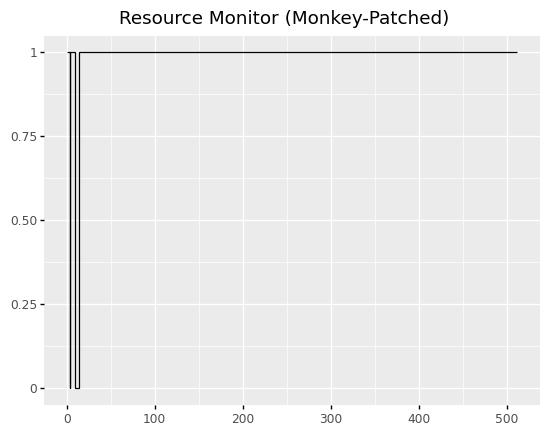

<ggplot: (279972304)>

In [3]:
x_monkey, y_monkey, _ = list(zip(*G.resource_monitor["dietician"]))
pMonkey = ggplot(aes(x=x_monkey, y=y_monkey)) \
            + geom_step() \
            + xlim(0, G.simulation_horizon) \
            + ggtitle("Resource Monitor (Monkey-Patched)")
pMonkey

In [4]:
avaUtil = G.number_of_dieticians * x_monkey[-1]
netUtil = trapz(y_monkey, x_monkey) 
percUtil = netUtil / avaUtil * 100
print("Dietician reported percentage utilization of {:.2f}={:.2f}/{:.2f}".format(percUtil, netUtil, avaUtil))
print("Dietician reported percentage utilization of {:.2f} from run metrics".format(sim_res.get("utilization")*100))

Dietician reported percentage utilization of 98.67=504.11/510.91
Dietician reported percentage utilization of 98.67 from run metrics
